In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import nltk
from gensim.models import KeyedVectors

C:\Users\Dell\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
vec_king=wv['king']

In [6]:
f = open('capitals.txt', 'r').read()

In [9]:
set_words = set(nltk.word_tokenize(f))
select_words = words = ['king', 'queen', 'oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
for w in select_words:
    set_words.add(w)

In [13]:
def get_word_embeddings(embeddings):

    word_embeddings = {}
    for word in embeddings.key_to_index:
        if word in set_words:
            word_embeddings[word] = embeddings[word]
    return word_embeddings

In [14]:
word_embeddings = get_word_embeddings(wv)
print(len(word_embeddings))
pickle.dump( word_embeddings, open( "word_embeddings_subset.p", "wb" ) )

243


In [2]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))
len(word_embeddings)  # there should be 243 words 

243

In [3]:
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

dimension: 300


In [4]:
#predict relationship between the words
#cosine similarity
def cosine_similarity(A, B):
    dot = np.dot(A,B)
    norma = np.sqrt(np.dot(A,A))
    normb = np.sqrt(np.dot(B,B))
    cos = dot/(norma*normb)

    
    return cos    

In [5]:
king = word_embeddings['king']
queen = word_embeddings['queen']

cosine_similarity(king, queen)

0.6510956

In [6]:
word_embeddings.keys()

dict_keys(['country', 'city', 'China', 'Iraq', 'oil', 'town', 'Canada', 'London', 'England', 'Australia', 'Japan', 'Pakistan', 'Iran', 'gas', 'happy', 'Russia', 'Afghanistan', 'France', 'Germany', 'Georgia', 'Baghdad', 'village', 'Spain', 'Italy', 'Beijing', 'Jordan', 'Paris', 'Ireland', 'Turkey', 'Egypt', 'Lebanon', 'Taiwan', 'Tokyo', 'Nigeria', 'Vietnam', 'Moscow', 'Greece', 'Indonesia', 'sad', 'Syria', 'Thailand', 'Libya', 'Zimbabwe', 'Cuba', 'Ottawa', 'Tehran', 'Sudan', 'Kenya', 'Philippines', 'Sweden', 'Poland', 'Ukraine', 'Rome', 'Venezuela', 'Switzerland', 'Berlin', 'Bangladesh', 'Portugal', 'Ghana', 'Athens', 'king', 'Madrid', 'Somalia', 'Dublin', 'Qatar', 'Chile', 'Islamabad', 'Bahrain', 'Nepal', 'Norway', 'Serbia', 'Kabul', 'continent', 'Brussels', 'Belgium', 'Uganda', 'petroleum', 'Cairo', 'Denmark', 'Austria', 'Jamaica', 'Georgetown', 'Bangkok', 'Finland', 'Peru', 'Romania', 'Bulgaria', 'Hungary', 'Vienna', 'Kingston', 'Manila', 'Cyprus', 'Azerbaijan', 'Copenhagen', 'Fiji',

In [7]:
#euclidean distance
def euclidean(A,B):
    d = np.sqrt(np.dot(A-B,A-B))
    return d

In [9]:
euclidean(king,queen)

2.4796925

In [11]:
happy=word_embeddings['happy']
sad=word_embeddings['sad']
print(cosine_similarity(happy,sad))
print(euclidean(happy,sad))

0.5354614
2.6144648


In [12]:
#get country 
def get_country(city1,country1,city2,embeddings):
    group=set((city1,country1,city2))
    
    city1_emb=word_embeddings[city1]
    country1_emb=word_embeddings[country1]
    city2_emb=word_embeddings[city2]
    
    vec=country1_emb-city1_emb+city2_emb
    
    similarity=-1
    country=''
    
    for word in embeddings.keys():
        
        if word not in group:
            word_emb=word_embeddings[word]
            
            cur_similartiy=cosine_similarity(vec,word_emb)
            
            if cur_similartiy>similarity:
                similarity=cur_similartiy
                country=(word,similarity)
                
    return country

In [13]:
get_country('Athens', 'Greece', 'Cairo',word_embeddings)

('Egypt', 0.7626821)

In [16]:
get_country('Athens', 'Greece', 'Beijing',word_embeddings)

('China', 0.71865916)

In [17]:
data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# print first five elements in the DataFrame
data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [18]:
def get_accuracy(word_embeddings,data):
    num_correct=0
    
    for i,row in data.iterrows():
        
        city1=row['city1']
        country1=row['country1']
        city2=row['city2']
        country2=row['country2']
        
        predicted_country,_=get_country(city1,country1,city2,word_embeddings)
        
        if predicted_country==country2:
            num_correct+=1
    m=len(data)
    
    accuracy=num_correct/m
    
    return accuracy


In [19]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


In [20]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def compute_pca(X, n_components=2):

    # mean center the data
    X_demeaned = X - np.mean(X,axis=0)

    # calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned,rowvar=False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')

    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    
    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = idx_sorted[::-1]

    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    eigen_vecs_subset = eigen_vecs_sorted[:,0:n_components]

    # transform the data by multiplying the transpose of the eigenvectors 
    # with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.dot(eigen_vecs_subset.transpose(),X_demeaned.transpose()).transpose()

    

    return X_reduced


In [22]:

def get_vectors(embeddings, words):

    m = len(words)
    X = np.zeros((1, 300))
    for word in words:
        english = word
        eng_emb = embeddings[english]
        X = np.row_stack((X, eng_emb))
    X = X[1:,:]
    return X


In [23]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


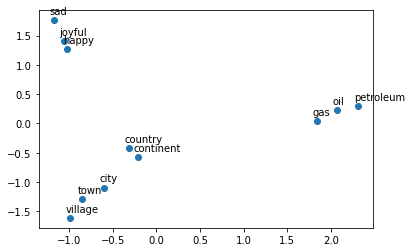

In [24]:
# We have done the plotting for you. Just run this cell.
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()